In [103]:
import cv2
#from cv2 import imshow as imshow
import numpy as np
from google.colab.patches import cv2_imshow as imshow

In [104]:
e= """ img1 = cv2.imread('img.png')
img2 = cv2.imread('img1.png')
img3 = cv2.imread("health-benefits-of-apples.png")
img4 = cv2.imread("red-apple-gala.webp")
img5 = cv2.imread("red-apple-gala-1.png")
"""
# Load the main image (bananas1.webp)
# Use IMREAD_UNCHANGED to ensure we load all channels
img = cv2.imread('bananas1.webp', cv2.IMREAD_UNCHANGED)
if img is None:
    raise IOError("Cannot load bananas1.webp. Check the path.")

# Load the template (banana-12t.png) which has transparency
template = cv2.imread('b12f.png', cv2.IMREAD_UNCHANGED)
if template is None:
    raise IOError("Cannot load banana-12t.png. Check the path.")


img3 = cv2.imread("bananat.png") # template2


In [142]:
def detect_bananas(image):
    """
    Detect bananas in an image, display bounding boxes around them, and return the image with bounding boxes and the array of bounding boxes.

    Args:
        image (np.ndarray): Input image as a 3-channel color NumPy array of type uint8.

    Returns:
        tuple: A tuple containing:
            - image_with_boxes (np.ndarray): The input image with bounding boxes drawn.
            - bounding_boxes (np.ndarray): A NumPy array of shape (N, 4) containing the bounding boxes in the format [x, y, w, h].
    """
    # Check if the image is valid
    if not isinstance(image, np.ndarray) or image.ndim != 3 or image.shape[2] != 3 or image.dtype != np.uint8:
        print("Error: Invalid image. Expected a 3-channel color image as a NumPy array of type uint8.")
        return None, None

    # Apply median filter to reduce noise while preserving edges
    image = cv2.medianBlur(image, 5)

    # Convert to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define a wider HSV range for yellow bananas
    lower_yellow = np.array([15, 100, 100])  # Hue: 15-45 captures more banana colors
    upper_yellow = np.array([45, 255, 255])

    # Create a binary mask for yellow regions
    mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

    # Use a larger kernel for morphological operations
    kernel = np.ones((7, 7), np.uint8)

    # Apply opening to remove small noise, closing to fill gaps
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Find contours
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Calculate image area for relative size filtering
    image_area = image.shape[0] * image.shape[1]

    # Collect bounding boxes
    bounding_boxes = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = w / float(h)
        area = w * h
        # Filters: wider aspect ratio (0.3-3.0), area (0.05%-15% of image)
        if 0.3 < aspect_ratio < 3.0 and 0.0005 * image_area < area < 0.15 * image_area:
            cv2.rectangle(image, (x, y), (x + w, y + h), (255,0, 0), 2) # Blue bounding box
            bounding_boxes.append([x, y, w, h])

    # Convert bounding_boxes to NumPy array
    if bounding_boxes:
        bounding_boxes = np.array(bounding_boxes, dtype=np.int32)
    else:
        bounding_boxes = np.zeros((0, 4), dtype=np.int32)
    return image, bounding_boxes

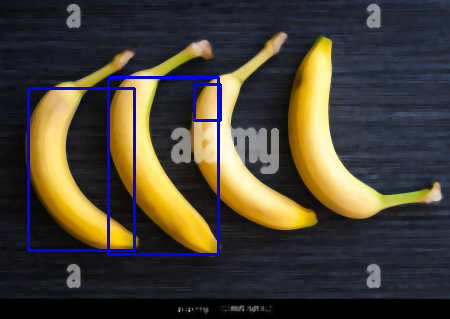

In [143]:
img = cv2.imread('four-bananas.jpg')
img_draw, _ = detect_bananas(img)
imshow(img_draw)